In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import csv
import numpy as np
import xarray as xr
import regionmask
from shapely.geometry import Polygon

In [3]:
# Load country polygons
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Preview beginning of country polygons dataset
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."


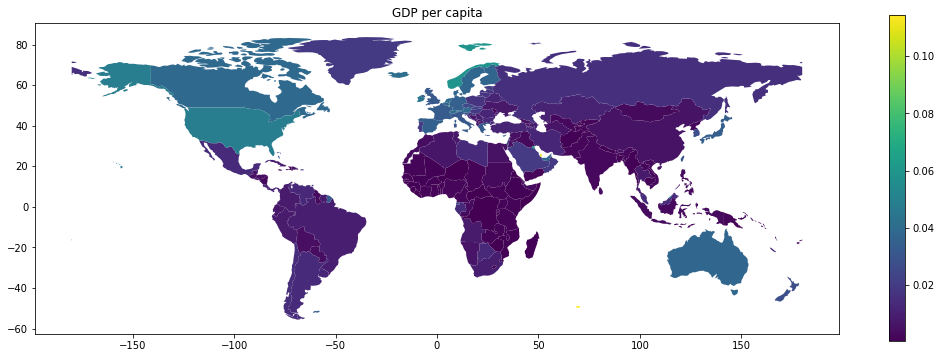

In [4]:
# Calculate GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

# Plot GDP per capta
f, ax = plt.subplots(1, figsize=(18, 6))
ax = world.plot(column='gdp_per_cap', ax=ax, legend = True)
ax.set_title("GDP per capita")
plt.show()

In [5]:
# Read capital data csv file
csv_file = '/home/jbaldwin/WorldBank/AVGRET/capital_data.csv'
with open(csv_file, mode='r') as csv_file:
    readCSV = csv.reader(csv_file)
    code = []
    year = []
    cgdpo = []
    ck = []
    for column in readCSV:
        #print(column)
        code0 = column[0]
        year0 = column[1]
        cgdpo0 = column[2]
        ck0 = column[3]
        
        code.append(code0)
        year.append(year0)
        cgdpo.append(cgdpo0)
        ck.append(ck0)
    #print(code)
    #print(year)
    #print(cgdpo)
    #print(ck)
    
code.remove('code')
year.remove('year')
cgdpo.remove('cgdpo')
ck.remove('ck')
        

In [6]:
# Calculate average return on capital for different countries
avgret = []
for i in range(len(code)):
    avgret.append(float(cgdpo[i])/float(ck[i]))
    
avgret[163] = None #value for Zimbabwe = 19, which is way too high

In [7]:
# Make list of average return on capital 
avgret2 = []
for key in world.iso_a3:
    if key in code:
        i = code.index(key)
        avgret2.append(avgret[i])
    if key not in code:
        avgret2.append(None)

world['avg_ret'] = avgret2

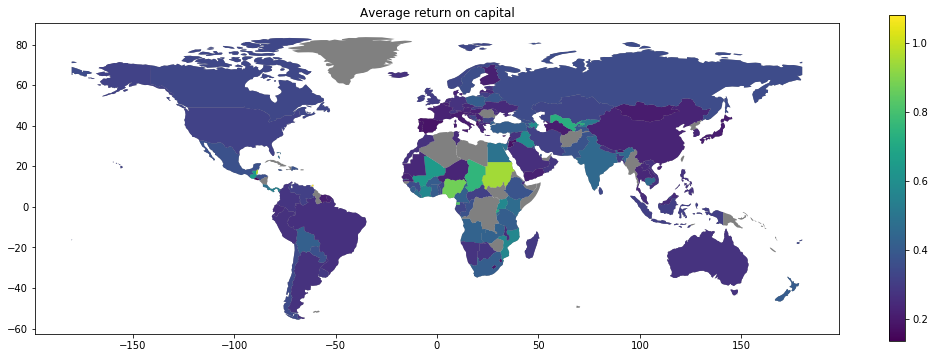

In [8]:
# Plot map of average return on capital
f, ax = plt.subplots(1, figsize=(18, 6))
ax = world.plot(color="grey", ax = ax)
world.dropna().plot(column='avg_ret', ax=ax, legend = True)
ax.set_title("Average return on capital")
plt.show()

In [9]:
# Calculate GDP per capital divided by average return
world['gdp_per_cap_div_avg_ret'] = world.gdp_per_cap / world.avg_ret

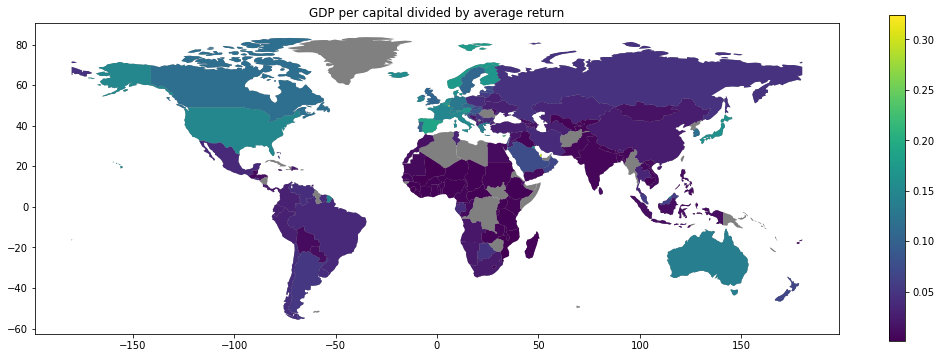

In [10]:
# Plot map of GDP per capital divided by average return
f, ax = plt.subplots(1, figsize=(18, 6))
ax = world.plot(color="grey", ax = ax)
world.dropna().plot(column='gdp_per_cap_div_avg_ret', ax=ax, legend = True)
ax.set_title("GDP per capital divided by average return")
plt.show()

In [43]:
# Load population dataset
pop_dat = xr.open_dataset('/home/jbaldwin/WorldBank/zsurf.nc')
#pop_dat = xr.open_dataset('/home/jbaldwin/WorldBank/WORLDPOP/ppp_2020_1km_Aggregated.nc')

In [15]:
# Preview population dataset
pop_dat

<xarray.Dataset>
Dimensions:       (GRID_XT: 576, GRID_YT: 360, bnds: 2)
Coordinates:
  * GRID_XT       (GRID_XT) float64 0.3125 0.9375 1.562 ... 358.4 359.1 359.7
  * GRID_YT       (GRID_YT) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Dimensions without coordinates: bnds
Data variables:
    GRID_XT_bnds  (GRID_XT, bnds) float64 ...
    GRID_YT_bnds  (GRID_YT, bnds) float64 ...
    ZSURF         (GRID_YT, GRID_XT) float32 ...
Attributes:
    history:      PyFerret V7.4 (optimized) 14-Oct-19
    Conventions:  CF-1.6

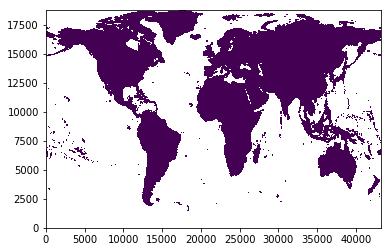

In [53]:
plt.pcolormesh(pop_dat.Band1)

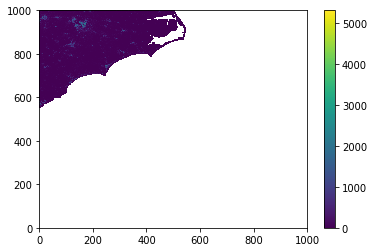

In [66]:
plt.pcolormesh(pop[12000:13000,12000:13000])
plt.colorbar()

In [44]:
# Select lat-lon-population variables and lat-lon bounds from population dataset
#lon = pop_dat.lon
#lat = pop_dat.lat
#pop = pop_dat.Band1
lon = pop_dat.GRID_XT #pop_dat.lon
lat = pop_dat.GRID_YT #pop_dat.lat
pop = pop_dat.ZSURF #pop_dat.Band1
LON_EDGE = lon
LAT_EDGE = lat

In [45]:
pop_dat

<xarray.Dataset>
Dimensions:       (GRID_XT: 576, GRID_YT: 360, bnds: 2)
Coordinates:
  * GRID_XT       (GRID_XT) float64 0.3125 0.9375 1.562 ... 358.4 359.1 359.7
  * GRID_YT       (GRID_YT) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Dimensions without coordinates: bnds
Data variables:
    GRID_XT_bnds  (GRID_XT, bnds) float64 ...
    GRID_YT_bnds  (GRID_YT, bnds) float64 ...
    ZSURF         (GRID_YT, GRID_XT) float32 ...
Attributes:
    history:      PyFerret V7.4 (optimized) 14-Oct-19
    Conventions:  CF-1.6

In [36]:
pop_dat.GRID_XT

<xarray.DataArray 'GRID_XT' (GRID_XT: 576)>
array([3.125000e-01, 9.375000e-01, 1.562500e+00, ..., 3.584375e+02,
       3.590625e+02, 3.596875e+02])
Coordinates:
  * GRID_XT  (GRID_XT) float64 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
Attributes:
    long_name:      T-cell longitude
    units:          degrees_east
    bounds:         GRID_XT_bnds
    modulo:         360.0
    point_spacing:  uneven
    axis:           X
    standard_name:  longitude

In [17]:
%%time
# Create region set of countries with their numbers
numbers = np.arange(0,world.shape[0],1).tolist()
names = world.name.tolist()
abbrevs = world.iso_a3.tolist()
polys = world.geometry.tolist()
countries_poly = regionmask.Regions_cls('countries', numbers, names, abbrevs, polys)

CPU times: user 20.1 ms, sys: 3.1 ms, total: 23.2 ms
Wall time: 21 ms


In [18]:
%%time
# Create country mask at resolution of population dataset (NOTE: TAKES A LONG TIME)
mask = countries_poly.mask(lon, lat, wrap_lon=True)
mask_ma = np.ma.masked_invalid(mask)

CPU times: user 24.5 s, sys: 63.5 ms, total: 24.6 s
Wall time: 24.6 s


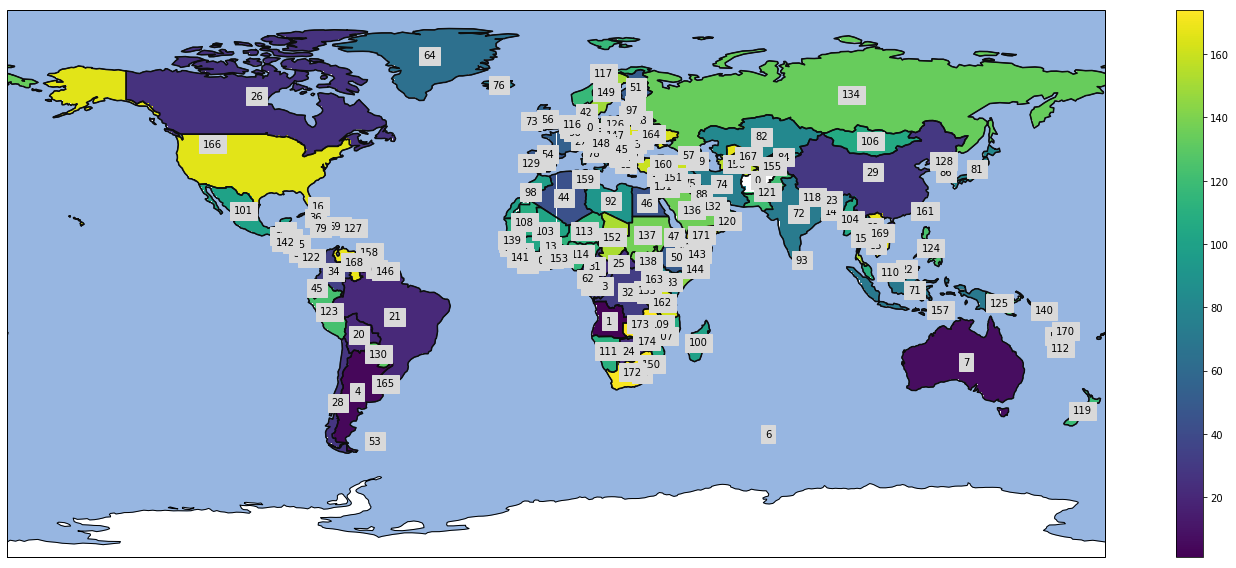

In [28]:
# Plot country mask with country numbers
f, ax = plt.subplots(1, figsize=(20, 8))
ax = countries_poly.plot()
h = plt.pcolormesh(LON_EDGE, LAT_EDGE, mask_ma, cmap='viridis')
plt.colorbar(h, orientation='vertical')
plt.tight_layout()

In [29]:
%%time
# Assign values [GDP per capita/ average return] to country mask
values = world.gdp_per_cap_div_avg_ret.tolist()
mask_ma_val = mask_ma
for i in numbers:
        mask_ma_val[np.where(mask_ma == i)] = values[i]

CPU times: user 252 ms, sys: 1.01 ms, total: 253 ms
Wall time: 251 ms


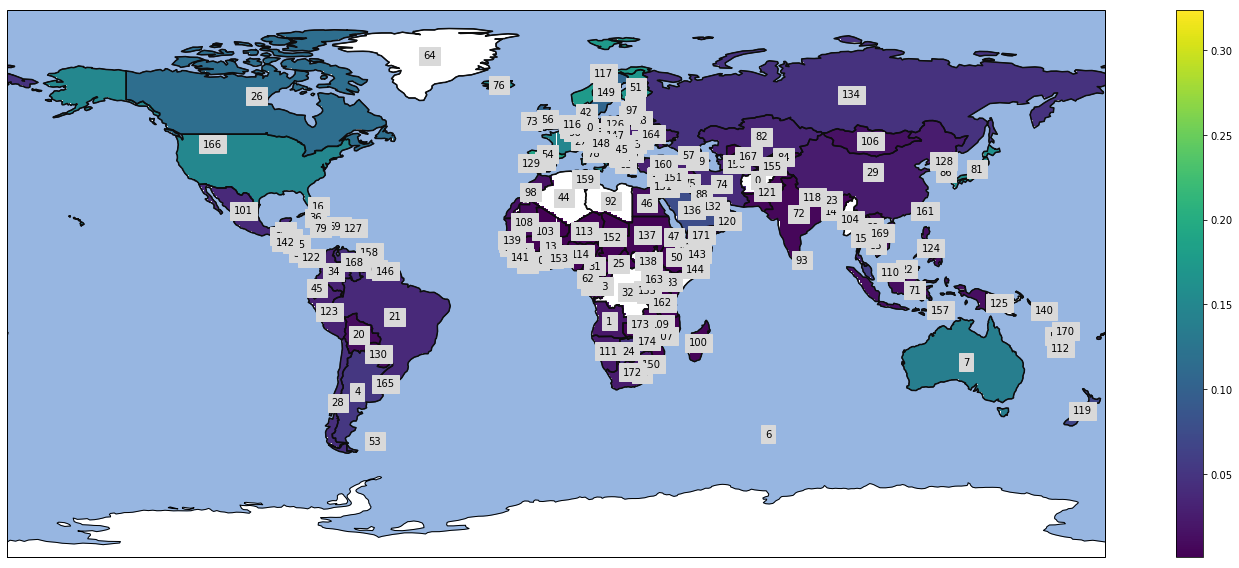

In [31]:
# Plot country mask with values
f, ax = plt.subplots(1, figsize=(20, 8))
ax = countries_poly.plot()
h = plt.pcolormesh(LON_EDGE, LAT_EDGE, mask_ma_val, cmap='viridis')
plt.colorbar(h, orientation='vertical')
plt.tight_layout()

In [32]:
%%time
# Multiply value country mask by population dataset to get exposed value
pop_mask = pop*mask_ma_val

CPU times: user 4.06 ms, sys: 4 ms, total: 8.07 ms
Wall time: 5.61 ms


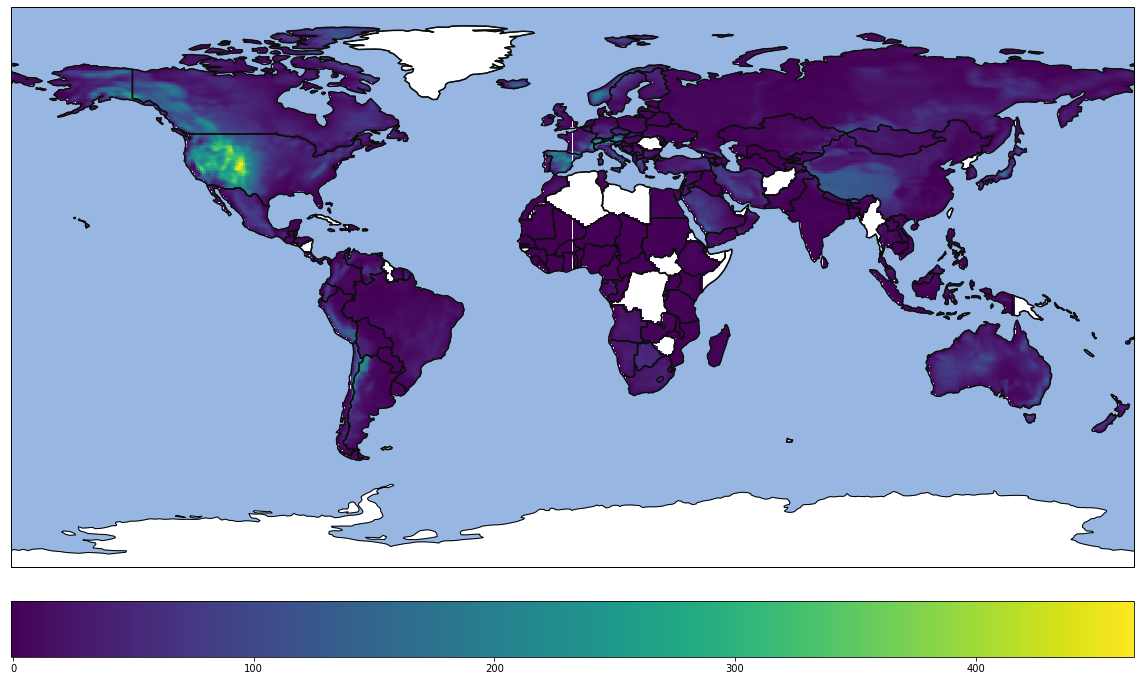

In [34]:
# Plot map of exposed value
f, ax = plt.subplots(1, figsize=(16, 12))
countries_poly.plot(add_label=False)
h = plt.pcolormesh(LON_EDGE, LAT_EDGE, pop_mask, cmap='viridis')
plt.colorbar(h, orientation='horizontal', pad=0.04)
plt.tight_layout()

In [105]:
# Save out netcdf of exposed value
ds = xr.Dataset({'exposed_value': (('lat', 'lon'), pop_mask)},
                coords={'lon': np.array(lon), 'lat': np.array(lat)})
ds.to_netcdf('exposed_value.nc')

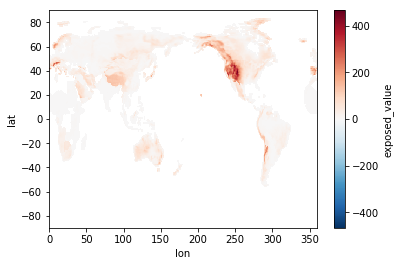

In [35]:
test = xr.open_dataset('exposed_value.nc')
test.exposed_value.plot()